In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
# 1. Generate synthetic time series data
np.random.seed(42)
dates = pd.date_range(start="2022-01-01", periods=100, freq="D")
values = np.sin(np.linspace(0, 20, 100)) + np.random.normal(scale=0.3, size=100)
df = pd.DataFrame({"Date": dates, "Value": values})
df.set_index("Date", inplace=True)

In [5]:
# 2. Create lag features
def create_lag_features(df, lag=5):
    for i in range(1, lag + 1):
        df[f"lag_{i}"] = df["Value"].shift(i)
    return df

df = create_lag_features(df)
df.dropna(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 95 entries, 2022-01-06 to 2022-04-10
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   95 non-null     float64
 1   lag_1   95 non-null     float64
 2   lag_2   95 non-null     float64
 3   lag_3   95 non-null     float64
 4   lag_4   95 non-null     float64
 5   lag_5   95 non-null     float64
dtypes: float64(6)
memory usage: 5.2 KB


In [9]:
df.describe()

,Value,lag_1,lag_2,lag_3,lag_4,lag_5
count,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000
mean,-0.024356,-0.026354,-0.024117,-0.025905,-0.030616,-0.027960
std,0.768827,0.766793,0.769576,0.767937,0.765383,0.765566
min,-1.425252,-1.425252,-1.425252,-1.425252,-1.425252,-1.425252
25%,-0.669168,-0.669168,-0.669168,-0.669168,-0.669168,-0.669168
50%,-0.103340,-0.103340,-0.103340,-0.103340,-0.103340,-0.098113
75%,0.743649,0.701164,0.701164,0.663925,0.663925,0.663925
max,1.440213,1.440213,1.440213,1.440213,1.440213,1.440213


In [27]:
# 3. Train-test split
train = df[:-10]
test = df[-10:]

X_train = train.drop("Value", axis=1)
y_train = train["Value"]
X_test = test.drop("Value", axis=1)
y_test = test["Value"]

In [29]:
# 4. Train model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [31]:
# 5. Predict
y_pred = model.predict(X_test)

In [33]:
# 6. Evaluation
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.08606065377247826


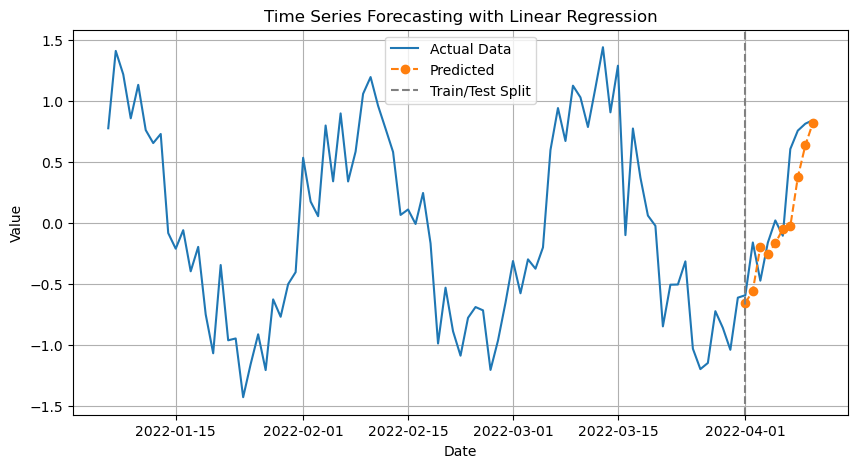

In [35]:
# 7. Plot results
plt.figure(figsize=(10, 5))
plt.plot(df.index, df["Value"], label="Actual Data")
plt.plot(test.index, y_pred, label="Predicted", linestyle='--', marker='o')
plt.axvline(test.index[0], color='gray', linestyle='--', label='Train/Test Split')
plt.legend()
plt.title("Time Series Forecasting with Linear Regression")
plt.xlabel("Date")
plt.ylabel("Value")
plt.grid(True)
plt.show()